In [35]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

In [51]:
data = pd.read_csv("/Users/magnus/Documents/Uni/WiSe24:25/Data Literacy/TuebiTigers/data/processed_data.csv")

# exlude all columns that are not numerical
data = data.select_dtypes(include=[np.number])
print(data.columns)

Index(['matchday_no', 'opponent_table_position', 'away_game', 'overtime',
       'tigers_win', 'opponent_points', 'tigers_points',
       'opponent_points_1st_quarter', 'tigers_points_1st_quarter',
       'opponent_points_2nd_quarter', 'tigers_points_2nd_quarter',
       'opponent_points_3rd_quarter', 'tigers_points_3rd_quarter',
       'opponent_points_4th_quarter', 'tigers_points_4th_quarter',
       'total_amount_fans', 'field_goals_attempted', 'field_goals_made',
       'rebounds', 'assists', 'turnovers', 'steals', 'fouls', 'jackson_points',
       'jackson_assists', 'rest_days'],
      dtype='object')


In [52]:
df = data
X = df.drop("tigers_win", axis=1)
y = df["tigers_win"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Logistic Regression to identify important features
model = LogisticRegression()
model.fit(X_scaled, y)

# Feature importance
importance = pd.Series(model.coef_[0], index=X.columns).sort_values()
print(importance)



opponent_points               -0.874994
opponent_points_1st_quarter   -0.723800
opponent_points_3rd_quarter   -0.676770
turnovers                     -0.419247
matchday_no                   -0.319091
jackson_assists               -0.285302
opponent_points_4th_quarter   -0.249884
fouls                         -0.184925
field_goals_attempted         -0.181894
overtime                      -0.171256
rebounds                      -0.148661
jackson_points                -0.126200
opponent_points_2nd_quarter   -0.093109
rest_days                     -0.045891
tigers_points_3rd_quarter     -0.019285
away_game                     -0.011219
opponent_table_position        0.013074
field_goals_made               0.051832
assists                        0.153977
total_amount_fans              0.253880
tigers_points_2nd_quarter      0.361283
tigers_points_4th_quarter      0.467684
tigers_points_1st_quarter      0.517496
tigers_points                  0.558400
steals                         0.712562


two features positively correlating with the chance of Tübingen winning the game

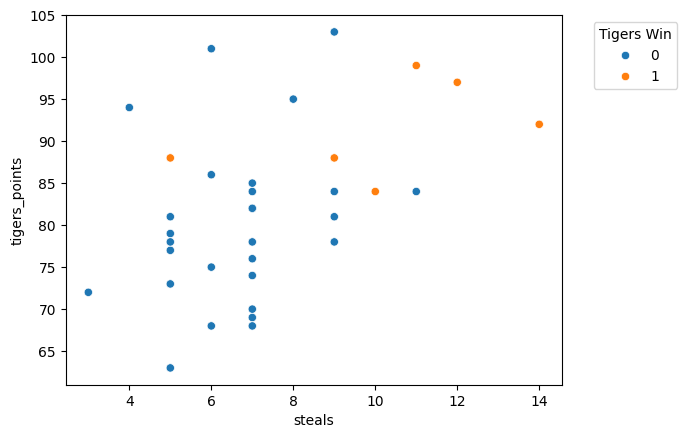

In [ ]:
sns.scatterplot(data=data, x="steals", y="tigers_points", hue="tigers_win")
plt.legend(title="Tigers Win", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Two features negatively correlating with the chance of Tübingen winning the game

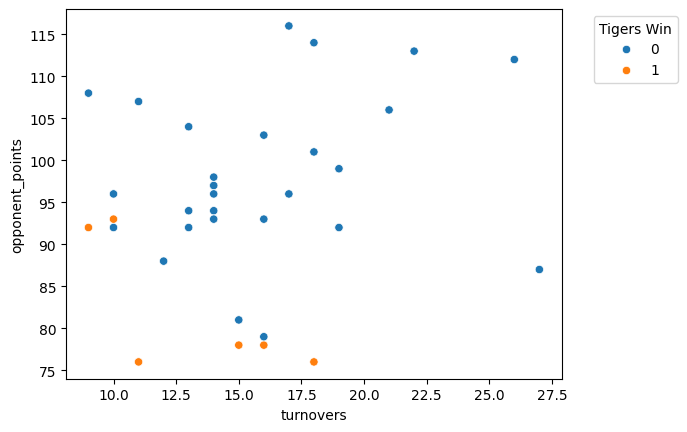

In [55]:
sns.scatterplot(data=data, x="turnovers", y="opponent_points", hue="tigers_win")
plt.legend(title="Tigers Win", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

/Users/magnus/miniconda3/envs/tigers_data_l/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


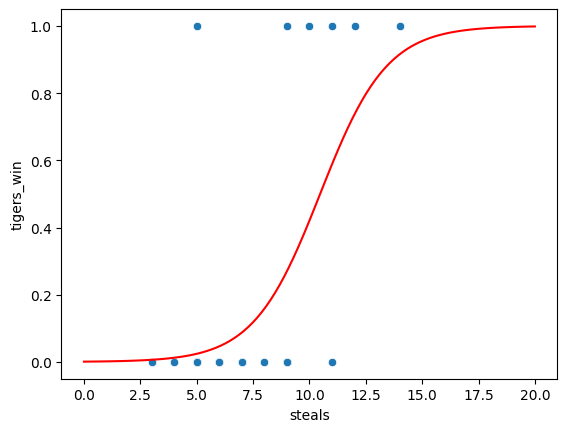

In [67]:
# 1D plot of steals and tigers win
# fit logistic regression model
model = LogisticRegression()
model.fit(data[["steals"]], data["tigers_win"])
# plot data and decision boundary
sns.scatterplot(data=data, x="steals", y="tigers_win")
sns.lineplot(x=np.linspace(0, 20, 100), y=model.predict_proba(np.linspace(0, 20, 100).reshape(-1, 1))[:, 1], color="red")
plt.show()